In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Activation

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import mean_absolute_error

In [2]:
data = 'coin_XRP.csv'
dataset = pd.read_csv(data)
chosen_col = 'Close'
print(len(dataset))
dataset.head()

2893


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.0,4.387916e+07
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.0,3.659101e+07
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.0,3.453412e+07
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.0,3.325863e+07
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.0,3.354750e+07


In [3]:
split_row = len(dataset) - int(0.2 * len(dataset))
train_data = dataset.iloc[:split_row]
test_data = dataset.iloc[split_row:]

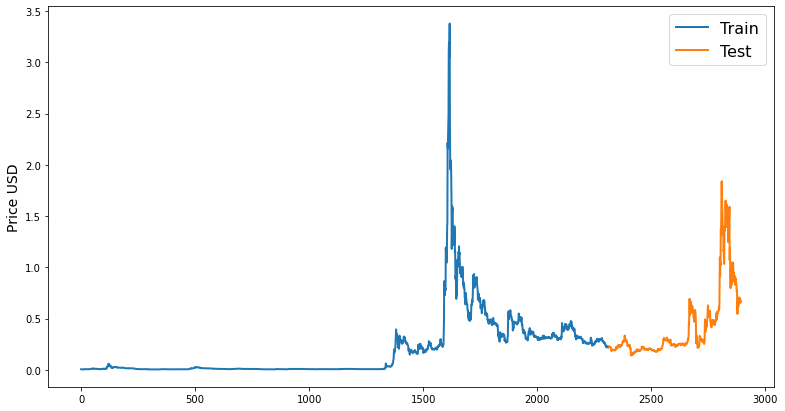

In [4]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train_data[chosen_col], label='Train', linewidth=2)
ax.plot(test_data[chosen_col], label='Test', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [5]:
datacol = dataset.iloc[:, 7:8].values
traincol = train_data.iloc[:, 7:8].values
testcol = test_data.iloc[:, 7:8].values

shaped_data = np.reshape(datacol, (-1,1))
train_shaped = np.reshape(traincol, (-1,1))
test_shaped = np.reshape(testcol, (-1,1))

sc = MinMaxScaler(feature_range=(0,1))
sc.fit(shaped_data)

train_scaled_data = sc.transform(train_shaped)
test_scaled_data = sc.transform(test_shaped)

In [6]:
X = []
y = []
time_steps = 50

for i in range(time_steps, len(train_data)):
    X.append(train_scaled_data[i-time_steps:i,0])
    y.append(train_scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam', loss='mse')

In [10]:
callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1, callbacks=[callback], shuffle=True)

Train on 1812 samples, validate on 453 samples
Epoch 1/100
1812/1812 [==============================] - 2s 1ms/sample - loss: 3.6721e-04 - val_loss: 2.8452e-04
Epoch 2/100
1812/1812 [==============================] - 2s 1ms/sample - loss: 3.8450e-04 - val_loss: 3.1016e-04
Epoch 3/100
1812/1812 [==============================] - 2s 928us/sample - loss: 2.5998e-04 - val_loss: 2.2416e-04
Epoch 4/100
1812/1812 [==============================] - 2s 935us/sample - loss: 3.2757e-04 - val_loss: 2.6074e-04
Epoch 5/100
1812/1812 [==============================] - 2s 972us/sample - loss: 3.7325e-04 - val_loss: 3.5900e-04
Epoch 6/100
1812/1812 [==============================] - 2s 971us/sample - loss: 3.0885e-04 - val_loss: 2.2905e-04
Epoch 7/100
1812/1812 [

In [13]:
X_testing = []
y_testing = []

for i in range(time_steps, len(test_data)):
    X_testing.append(test_scaled_data[i-time_steps:i,0])
    y_testing.append(test_scaled_data[i, 0])

X_testing, y_testing = np.array(X_testing), np.array(y_testing)
X_testing = np.reshape(X_testing, (X_testing.shape[0], X_testing.shape[1], 1))

predicted_price = model.predict(X_testing)
inv_price = sc.inverse_transform(predicted_price)
real_price = np.reshape(y_testing, (-1,1))
real_price = sc.inverse_transform(real_price)

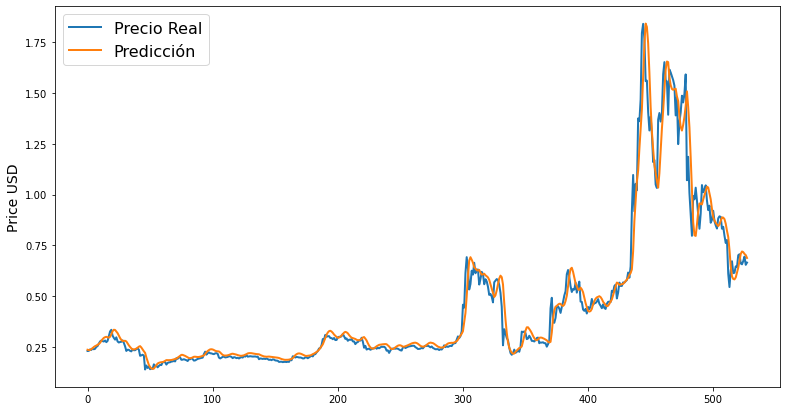

In [14]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Precio Real', linewidth=2)
ax.plot(inv_price, label='Predicción', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [ ]:
import numpy as np


x = np.array([real_price,inv_price])
x = []
for o in real_price:
    x.append(o[0])

y = []
for o in inv_price:
    y.append(float(o[0]))

res = np.array([x,y])
res = np.transpose(res)
column_names = ['RealPrice','Prediction']
import csv
with open('test.csv', 'w', newline = '') as good_data:    
    writer = csv.writer(good_data, delimiter = '|')
    writer.writerow(column_names)
    for row in res:
        print(type(row))
        # row = row.split(',')
        writer.writerow(row)

